In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from shutil import rmtree
from os.path import isdir
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [4]:
%load_ext tensorboard

In [5]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# plt.figure(figsize=[10,2])
# f, ax = plt.subplots(1, 10, figsize=[20,5])
# plt.imshow()
# for i in range(0, 10):
# 	image = np.reshape(x_train_raw[i], (28,28))
# 	label = y_train_raw[i]
# 	ax[i].imshow(image)
# 	ax[i].set_title(label)
	# plt.figimage(image)
# plt.show()


In [7]:
pd.DataFrame(y_train_raw).describe()

,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [8]:
x_train = np.reshape(x_train_raw, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train_raw, 10).numpy()
x_test = np.reshape(x_test_raw, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test_raw, 10).numpy()

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [10]:
drop = 0.1

In [2]:
model = None
model = Sequential()

model.add(preprocessing.Resizing(28, 28))
model.add(preprocessing.Rescaling(1./255))

# model.add(preprocessing.RandomFlip())
model.add(preprocessing.RandomRotation(0.10))
# model.add(preprocessing.RandomContrast(0.05))
# model.add(preprocessing.RandomZoom(0.05, 0.05))

model.add(Conv2D(512, 7, activation=LeakyReLU(), input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(256, 5, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(128, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(128, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(64, LeakyReLU()))
model.add(BatchNormalization())
# model.add(Dropout(0.20))

model.add(Dense(10, 'softmax'))

model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.CategoricalCrossentropy(), 'accuracy')
model.build(input_shape=(1, 28, 28, 1))
model.summary()

NameError: ignored

In [62]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_delta=0.002, factor=0.4, patience=2) #0.001
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.002, patience=3, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [61]:
if isdir('./logs'):
    rmtree('./logs')
else:
    print('LOGS DOES NOT EXIST')
tbcb = tf.keras.callbacks.TensorBoard()

In [63]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Epoch 1/100
422/422 [==============================] - 102s 234ms/step - loss: 0.5257 - accuracy: 0.8086 - val_loss: 1.3466 - val_accuracy: 0.5655
Epoch 2/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3771 - accuracy: 0.8609 - val_loss: 0.4219 - val_accuracy: 0.8527
Epoch 3/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3309 - accuracy: 0.8779 - val_loss: 0.3722 - val_accuracy: 0.8662
Epoch 4/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3075 - accuracy: 0.8871 - val_loss: 0.3547 - val_accuracy: 0.8758
Epoch 5/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2890 - accuracy: 0.8933 - val_loss: 0.2894 - val_accuracy: 0.8933
Epoch 6/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2756 - accuracy: 0.8989 - val_loss: 0.3054 - val_accuracy: 0.8900
Epoch 7/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2629 - accuracy: 0.9027 - val_loss: 0.2947 

KeyboardInterrupt: 

In [64]:
model_train = model.fit(x_train, y_train, 512, 100, 1, callbacks=[learning_rate, early_stop, tbcb], validation_data=(x_valid, y_valid)).history # 

Epoch 1/100
106/106 [==============================] - 69s 604ms/step - loss: 0.6240 - accuracy: 0.7755 - val_loss: 3.6017 - val_accuracy: 0.2517
Epoch 2/100
106/106 [==============================] - 60s 562ms/step - loss: 0.4190 - accuracy: 0.8451 - val_loss: 4.1013 - val_accuracy: 0.1805
Epoch 3/100
106/106 [==============================] - 60s 569ms/step - loss: 0.3665 - accuracy: 0.8640 - val_loss: 2.2380 - val_accuracy: 0.4110
Epoch 4/100
106/106 [==============================] - 60s 570ms/step - loss: 0.3325 - accuracy: 0.8764 - val_loss: 0.9957 - val_accuracy: 0.6617
Epoch 5/100
106/106 [==============================] - 60s 566ms/step - loss: 0.3045 - accuracy: 0.8881 - val_loss: 0.5622 - val_accuracy: 0.7967
Epoch 6/100
106/106 [==============================] - 60s 566ms/step - loss: 0.2863 - accuracy: 0.8944 - val_loss: 0.4188 - val_accuracy: 0.8472
Epoch 7/100
106/106 [==============================] - 60s 570ms/step - loss: 0.2713 - accuracy: 0.8999 - val_loss: 0.3438 -

In [1]:
model.evaluate(x_test, y_test)

NameError: ignored

(7, 7, 512)
(5, 5, 512, 256)
(5, 5, 256, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)


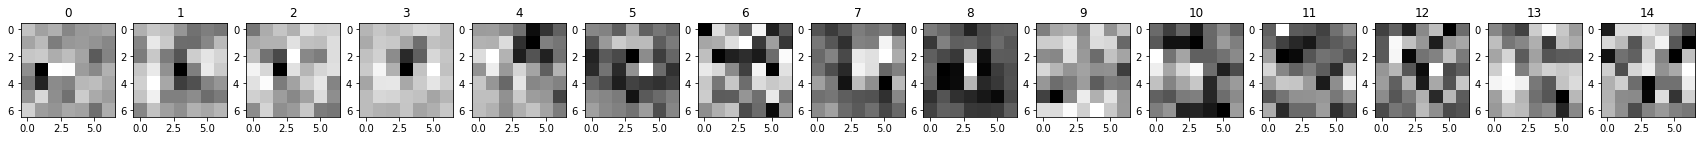

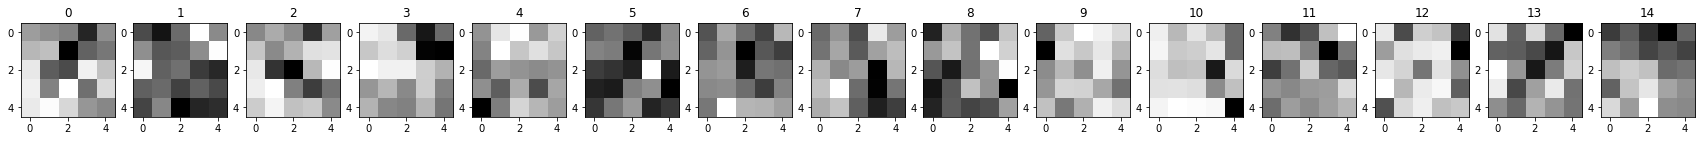

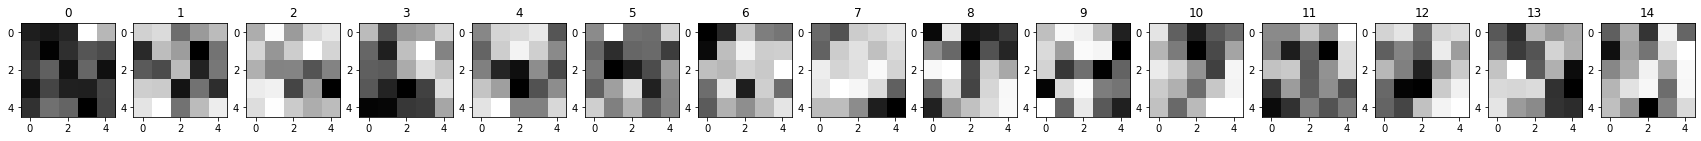

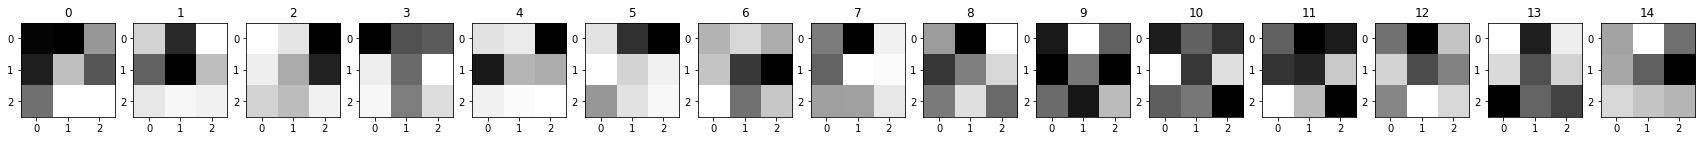

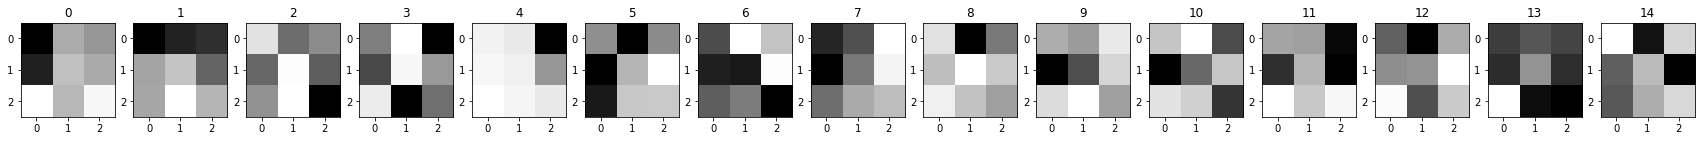

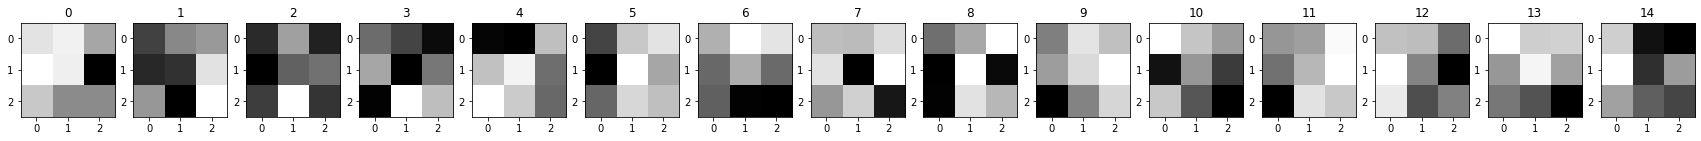

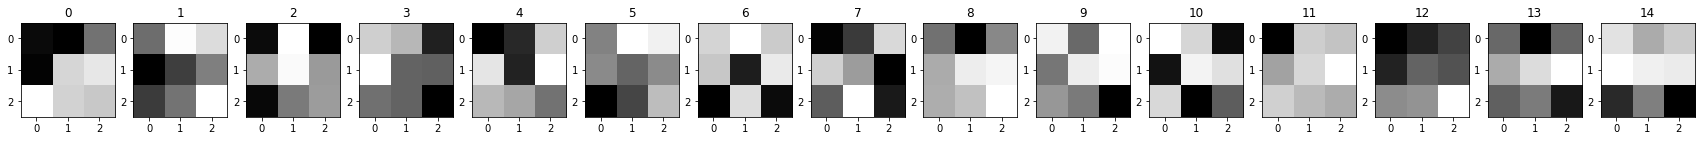

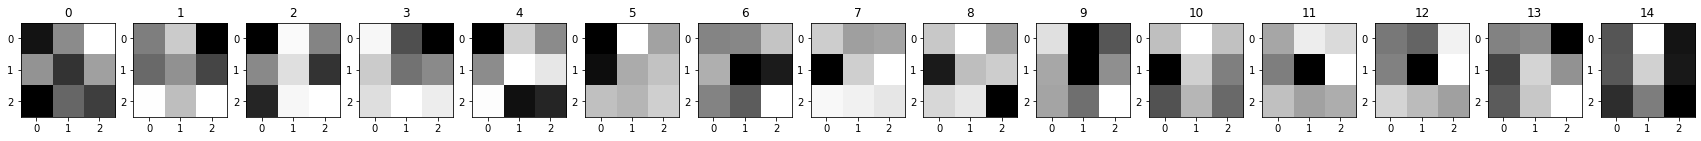

In [55]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        print(W.shape)
        if len(W.shape) == 4:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2] * W.shape[3]) 
        else:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2]) 
        fig, axs = plt.subplots(1,15, figsize=(30,30))
        # fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(15):
            axs[i].imshow(W[:,:,i], cmap='Greys_r')
            axs[i].set_title(str(i))

for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    else:
        plot_conv_weights(model, layer.name)

In [56]:
# plt.figure(figsize=[10,2])

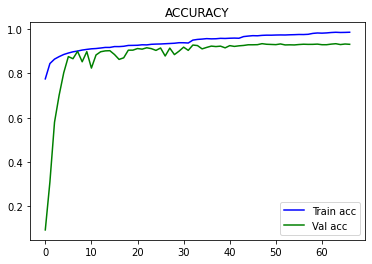

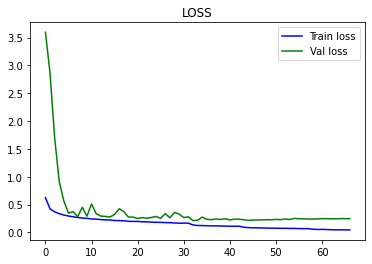

<Figure size 432x288 with 0 Axes>

In [57]:
acc = model_train['accuracy']
val_acc = model_train['val_accuracy']
loss = model_train['loss']
val_loss = model_train['val_loss']
epoch_count = range(len(acc))

plt.plot(epoch_count, acc, 'b', label='Train acc')
plt.plot(epoch_count, val_acc, 'g', label='Val acc')
plt.title('ACCURACY')
plt.legend()
plt.figure()

plt.plot(epoch_count, loss, 'b', label='Train loss')
plt.plot(epoch_count, val_loss, 'g', label='Val loss')
plt.title('LOSS')
plt.legend()
plt.figure()

plt.show()